### Data Description
Photoplethysmograph (PPG) is a physiological signal used to describe the volumetric change of blood flow in peripherals with heart beats. A hardware configuration is employed to capture PPG signals from a number of persons using an IoT sensor. This dataset contains PPG signals from 35 healthy persons , with 50 to 60 PPG signal for each one. The age range of participants is 10-75 years, with an average age of 28.4 years. Each PPG signal contains 300 samples (6 seconds recording) with 50 sample/second sampling rate. The dataset is split into two files: one for training the ANN which contains 1374 PPG signal (about 66% of complete dataset), and the other file to test the ANN which contains 700 PPG signal (about 34% of complete dataset).

In [59]:
import pandas as pd

ppg = pd.read_excel('./dataset/Real_World_PPG_dataset_train8.xlsx', header=None)
ppg

,0,1,2,3,4,5,6,7,8,9,...,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373
0,35509,34917.0,34685.0,34275.0,34292.0,34613.0,35120.0,34477.0,32874.0,33119.0,...,28764.0,28598.0,28409.0,28742.0,28690.0,28721.0,28611.0,28371.0,28442.0,28801.0
1,35508,34936.0,34700.0,34275.0,34303.0,34632.0,35133.0,34494.0,32903.0,33136.0,...,28750.0,28602.0,28356.0,28727.0,28692.0,28728.0,28613.0,28387.0,28433.0,28809.0
2,35500,34959.0,34706.0,34281.0,34314.0,34648.0,35152.0,34500.0,32927.0,33155.0,...,28747.0,28624.0,28334.0,28724.0,28693.0,28740.0,28607.0,28396.0,28431.0,28816.0
3,35484,34960.0,34713.0,34295.0,34324.0,34669.0,35171.0,34503.0,32968.0,33179.0,...,28754.0,28646.0,28322.0,28725.0,28693.0,28746.0,28608.0,28406.0,28436.0,28819.0
4,35479,34884.0,34723.0,34313.0,34338.0,34684.0,35179.0,34514.0,33013.0,33202.0,...,28768.0,28664.0,28335.0,28726.0,28695.0,28752.0,28609.0,28416.0,28445.0,28827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,Serial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,1,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,1365.0,1366.0,1367.0,1368.0,1369.0,1370.0,1371.0,1372.0,1373.0,1374.0
303,ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
ppg = ppg.transpose()
ppg

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,300,301,302,303,304
0,35509,35508,35500,35484,35479,35476,35479,35487,35508,35528,...,35332,35358,35378,35402,35392,NaN,Serial,1,ID,1
1,34917.0,34936.0,34959.0,34960.0,34884.0,34747.0,34673.0,34635.0,34615.0,34604.0,...,34558.0,34572.0,34584.0,34594.0,34594.0,NaN,NaN,2.0,NaN,1.0
2,34685.0,34700.0,34706.0,34713.0,34723.0,34730.0,34745.0,34756.0,34760.0,34740.0,...,34491.0,34483.0,34492.0,34504.0,34516.0,NaN,NaN,3.0,NaN,1.0
3,34275.0,34275.0,34281.0,34295.0,34313.0,34339.0,34360.0,34384.0,34409.0,34441.0,...,34618.0,34610.0,34607.0,34614.0,34627.0,NaN,NaN,4.0,NaN,1.0
4,34292.0,34303.0,34314.0,34324.0,34338.0,34344.0,34354.0,34369.0,34376.0,34392.0,...,34487.0,34498.0,34505.0,34512.0,34523.0,NaN,NaN,5.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,28721.0,28728.0,28740.0,28746.0,28752.0,28753.0,28746.0,28715.0,28680.0,28648.0,...,28739.0,28735.0,28718.0,28682.0,28644.0,NaN,NaN,1370.0,NaN,35.0
1370,28611.0,28613.0,28607.0,28608.0,28609.0,28609.0,28614.0,28619.0,28627.0,28634.0,...,28543.0,28540.0,28537.0,28536.0,28542.0,NaN,NaN,1371.0,NaN,35.0
1371,28371.0,28387.0,28396.0,28406.0,28416.0,28428.0,28435.0,28444.0,28454.0,28470.0,...,28486.0,28504.0,28518.0,28533.0,28550.0,NaN,NaN,1372.0,NaN,35.0
1372,28442.0,28433.0,28431.0,28436.0,28445.0,28462.0,28481.0,28502.0,28526.0,28542.0,...,28484.0,28498.0,28514.0,28531.0,28542.0,NaN,NaN,1373.0,NaN,35.0


In [61]:
for i in range(300):
    ppg[i] = ppg[i].apply(lambda x: x / 10000.0)
ppg

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,300,301,302,303,304
0,3.5509,3.5508,3.5500,3.5484,3.5479,3.5476,3.5479,3.5487,3.5508,3.5528,...,3.5332,3.5358,3.5378,3.5402,3.5392,NaN,Serial,1,ID,1
1,3.4917,3.4936,3.4959,3.4960,3.4884,3.4747,3.4673,3.4635,3.4615,3.4604,...,3.4558,3.4572,3.4584,3.4594,3.4594,NaN,NaN,2.0,NaN,1.0
2,3.4685,3.4700,3.4706,3.4713,3.4723,3.4730,3.4745,3.4756,3.4760,3.4740,...,3.4491,3.4483,3.4492,3.4504,3.4516,NaN,NaN,3.0,NaN,1.0
3,3.4275,3.4275,3.4281,3.4295,3.4313,3.4339,3.4360,3.4384,3.4409,3.4441,...,3.4618,3.4610,3.4607,3.4614,3.4627,NaN,NaN,4.0,NaN,1.0
4,3.4292,3.4303,3.4314,3.4324,3.4338,3.4344,3.4354,3.4369,3.4376,3.4392,...,3.4487,3.4498,3.4505,3.4512,3.4523,NaN,NaN,5.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,2.8721,2.8728,2.8740,2.8746,2.8752,2.8753,2.8746,2.8715,2.8680,2.8648,...,2.8739,2.8735,2.8718,2.8682,2.8644,NaN,NaN,1370.0,NaN,35.0
1370,2.8611,2.8613,2.8607,2.8608,2.8609,2.8609,2.8614,2.8619,2.8627,2.8634,...,2.8543,2.8540,2.8537,2.8536,2.8542,NaN,NaN,1371.0,NaN,35.0
1371,2.8371,2.8387,2.8396,2.8406,2.8416,2.8428,2.8435,2.8444,2.8454,2.8470,...,2.8486,2.8504,2.8518,2.8533,2.8550,NaN,NaN,1372.0,NaN,35.0
1372,2.8442,2.8433,2.8431,2.8436,2.8445,2.8462,2.8481,2.8502,2.8526,2.8542,...,2.8484,2.8498,2.8514,2.8531,2.8542,NaN,NaN,1373.0,NaN,35.0


In [62]:
ppg_test = pd.read_excel('./dataset/Real_World_PPG_dataset_test8.xlsx', header=None)
ppg_test

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,35115.0,34856.0,35398.0,34462.0,35153.0,35457.0,33382.0,34538.0,35012.0,34985.0,...,29496.0,29361.0,29285.0,29654.0,29577.0,29106.0,28819.0,29448.0,29461.0,29329.0
1,35119.0,34866.0,35413.0,34484.0,35171.0,35367.0,33246.0,34554.0,35040.0,35015.0,...,29505.0,29360.0,29283.0,29657.0,29589.0,29097.0,28819.0,29441.0,29470.0,29337.0
2,35113.0,34884.0,35415.0,34500.0,35193.0,35210.0,33025.0,34564.0,35064.0,35031.0,...,29518.0,29357.0,29278.0,29666.0,29594.0,29098.0,28813.0,29451.0,29480.0,29338.0
3,35107.0,34895.0,35349.0,34506.0,35200.0,35129.0,32896.0,34575.0,35090.0,35051.0,...,29528.0,29361.0,29278.0,29675.0,29599.0,29113.0,28808.0,29463.0,29495.0,29346.0
4,35107.0,34913.0,35210.0,34443.0,35221.0,35082.0,32844.0,34581.0,35103.0,35072.0,...,29540.0,29369.0,29284.0,29688.0,29609.0,29129.0,28810.0,29475.0,29505.0,29352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,691.0,692.0,693.0,694.0,695.0,696.0,697.0,698.0,699.0,700.0
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
ppg_test = ppg_test.transpose()
ppg_test

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,300,301,302,303,304
0,35115.0,35119.0,35113.0,35107.0,35107.0,35111.0,35109.0,35114.0,35118.0,35130.0,...,34896.0,34921.0,34941.0,34949.0,34967.0,NaN,NaN,1.0,NaN,1.0
1,34856.0,34866.0,34884.0,34895.0,34913.0,34935.0,34948.0,34960.0,34986.0,35000.0,...,34928.0,34938.0,34923.0,34814.0,34697.0,NaN,NaN,2.0,NaN,1.0
2,35398.0,35413.0,35415.0,35349.0,35210.0,35121.0,35076.0,35061.0,35060.0,35069.0,...,35507.0,35520.0,35512.0,35410.0,35251.0,NaN,NaN,3.0,NaN,1.0
3,34462.0,34484.0,34500.0,34506.0,34443.0,34320.0,34226.0,34172.0,34137.0,34126.0,...,34295.0,34310.0,34338.0,34368.0,34381.0,NaN,NaN,4.0,NaN,1.0
4,35153.0,35171.0,35193.0,35200.0,35221.0,35241.0,35266.0,35281.0,35282.0,35269.0,...,35302.0,35322.0,35336.0,35349.0,35361.0,NaN,NaN,5.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,29106.0,29097.0,29098.0,29113.0,29129.0,29138.0,29144.0,29147.0,29157.0,29159.0,...,29341.0,29342.0,29349.0,29355.0,29358.0,NaN,NaN,696.0,NaN,35.0
696,28819.0,28819.0,28813.0,28808.0,28810.0,28809.0,28816.0,28821.0,28829.0,28835.0,...,28803.0,28809.0,28814.0,28823.0,28824.0,NaN,NaN,697.0,NaN,35.0
697,29448.0,29441.0,29451.0,29463.0,29475.0,29481.0,29490.0,29491.0,29500.0,29506.0,...,29586.0,29584.0,29587.0,29592.0,29600.0,NaN,NaN,698.0,NaN,35.0
698,29461.0,29470.0,29480.0,29495.0,29505.0,29515.0,29520.0,29526.0,29537.0,29543.0,...,29574.0,29584.0,29587.0,29592.0,29603.0,NaN,NaN,699.0,NaN,35.0


In [64]:
import heartpy as hp
import matplotlib.pyplot as plt

sample_rate = 50

ppg.to_csv('./dataset/train_ppg_transposed.csv', encoding='utf-8', mode='w', index=False)
data = hp.get_data('./dataset/train_ppg_transposed.csv')

data[1:300][0]

array([3.5509, 3.5508, 3.55  , 3.5484, 3.5479, 3.5476, 3.5479, 3.5487,
       3.5508, 3.5528, 3.5547, 3.5567, 3.5588, 3.5618, 3.5648, 3.5668,
       3.5689, 3.5711, 3.5711, 3.5629, 3.5449, 3.5355, 3.5309, 3.5293,
       3.5295, 3.5303, 3.5322, 3.5352, 3.5371, 3.5385, 3.5405, 3.5432,
       3.5454, 3.5468, 3.5481, 3.5476, 3.5467, 3.5454, 3.5455, 3.5457,
       3.5456, 3.5479, 3.5498, 3.5518, 3.5541, 3.5563, 3.5604, 3.5627,
       3.5654, 3.5677, 3.5698, 3.5676, 3.5525, 3.5368, 3.5314, 3.5286,
       3.5271, 3.5277, 3.5293, 3.5313, 3.5328, 3.5337, 3.5359, 3.5374,
       3.5399, 3.5417, 3.5433, 3.5439, 3.5434, 3.5437, 3.5428, 3.5426,
       3.543 , 3.5437, 3.5462, 3.5478, 3.5499, 3.5518, 3.5557, 3.5579,
       3.5605, 3.5636, 3.5658, 3.5651, 3.5556, 3.5384, 3.5307, 3.5271,
       3.5254, 3.5254, 3.5266, 3.5282, 3.5302, 3.5314, 3.5325, 3.5341,
       3.5371, 3.5395, 3.5411, 3.5417, 3.5412, 3.5405, 3.5404, 3.5401,
       3.5403, 3.5408, 3.5417, 3.5439, 3.5464, 3.5489, 3.5512, 3.5537,
      

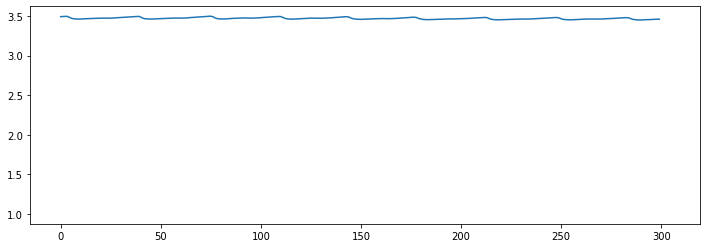

In [68]:
plt.figure(figsize=(12,4))
plt.plot(data[1:300][1])
plt.show()

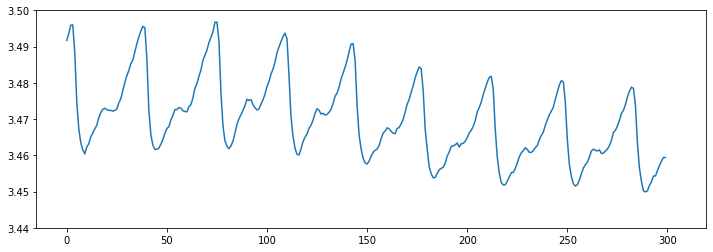

In [65]:
plt.figure(figsize=(12,4))
# plt.ylim(3.5, 3.58)
plt.ylim(3.44, 3.5)
plt.plot(data[1:300][1])
plt.show()

In [66]:
import matplotlib.pyplot as plt
import numpy as np



In [67]:
wd, m = hp.process(data[1:300][1], sample_rate)

plt.figure(figsize=(12, 4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------
